<a href="https://colab.research.google.com/github/sunithapillai/datasharing/blob/master/cnn_withpredict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split

import tensorflow as tf

In [ ]:

# Visualization
def draw_vector(v0, v1, color='k', ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->', linewidth=2, shrinkA=0, shrinkB=0, color=color)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

def plot(X, y, pca=None, lda=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.2)

    if pca is not None:
        # draw first component
        length, vector = pca.explained_variance_[0], pca.components_[0]
        v = vector / np.sqrt(vector**2)
        draw_vector(pca.mean_, pca.mean_ + v)

    if lda is not None:
        # draw first component
        length, vector = lda.intercept_[0], lda.coef_[0]
        v = vector / np.sqrt(vector**2)
        draw_vector(lda.xbar_, lda.xbar_ + v, color='r')

    plt.axis('equal')
    plt.show()

def show_images(imgs, num_rows, num_cols):
    assert len(imgs) == num_rows*num_cols

    for i in range(num_rows):
        row = None
        for j in range(num_cols):
            if row is None:
                row = imgs[i*num_cols+j]
            else:
                row = np.concatenate((row, imgs[i*num_cols+j]), axis=1)
        plt.imshow(row, cmap='gray')
        plt.axis('off')
        plt.show()

# Visualization
def plotldaoutput(X, y, lda=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.2)

    if lda is not None:
        # draw first two components
        length, vector = lda.intercept_[0], lda.coef_[0][:2]
        v = vector / np.sqrt(vector**2)
        draw_vector(lda.xbar_[:2], lda.xbar_[:2] + v, color='r')

    plt.axis('equal')
    plt.show()

def plot_confusion(cm):
    plt.rcParams["figure.figsize"] = (15,15)
    fig, ax = plt.subplots()
    c= ax.matshow(cm, cmap='copper')
    fig.colorbar(c, ax=ax)
    for i in range(len(cm)):
        for j in range(len(cm[0])):
            text = ax.text(j, i, cm[i, j], ha='center', va='center', color='w', fontsize=10, weight='bold')
    plt.xticks(range(40))
    plt.yticks(range(40))
    plt.show()






In [21]:


# Get the dataset

faces = fetch_olivetti_faces()

_, img_height, img_width = faces.images.shape

print(faces.images.shape)


x_train, x_test, y_train, y_test = train_test_split(faces.images, faces.target, test_size=0.2, random_state=0)

print(x_train.shape)

print (x_test.shape)


##get another subset for validation

xt_train, x_val, yt_train, y_val = train_test_split(x_train, y_train, test_size=0.125, random_state=0)

print(xt_train.shape)

print (x_val.shape)

(400, 64, 64)
(320, 64, 64)
(80, 64, 64)
(280, 64, 64)
(40, 64, 64)


In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=(64, 64, 1)))
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=120, activation='relu'))
model.add(tf.keras.layers.Dense(units=84, activation='relu'))
model.add(tf.keras.layers.Dense(units=40, activation = 'softmax'))

print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 60, 60, 6)         156       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 30, 30, 6)        0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 26, 26, 16)        2416      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 13, 13, 16)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 2704)              0         
                                                                 
 dense_9 (Dense)             (None, 120)              

In [ ]:
learning_rate = 0.001
loss_function = 'sparse_categorical_crossentropy'
batch_size = 20 #originall tested with 32
num_epochs = 50

Epoch 1/50
14/14 [==============================] - 2s 100ms/step - loss: 3.6977 - accuracy: 0.0250 - val_loss: 3.6960 - val_accuracy: 0.0125
Epoch 2/50
14/14 [==============================] - 1s 79ms/step - loss: 3.6791 - accuracy: 0.0750 - val_loss: 3.6930 - val_accuracy: 0.0125
Epoch 3/50
14/14 [==============================] - 1s 77ms/step - loss: 3.6378 - accuracy: 0.0464 - val_loss: 3.7309 - val_accuracy: 0.0250
Epoch 4/50
14/14 [==============================] - 1s 79ms/step - loss: 3.5619 - accuracy: 0.0750 - val_loss: 3.6352 - val_accuracy: 0.0625
Epoch 5/50
14/14 [==============================] - 1s 78ms/step - loss: 3.3869 - accuracy: 0.2286 - val_loss: 3.5154 - val_accuracy: 0.1000
Epoch 6/50
14/14 [==============================] - 1s 78ms/step - loss: 3.0775 - accuracy: 0.2250 - val_loss: 3.1690 - val_accuracy: 0.3500
Epoch 7/50
14/14 [==============================] - 1s 85ms/step - loss: 2.6920 - accuracy: 0.3821 - val_loss: 3.0250 - val_accuracy: 0.3125
Epoch 8/50
1

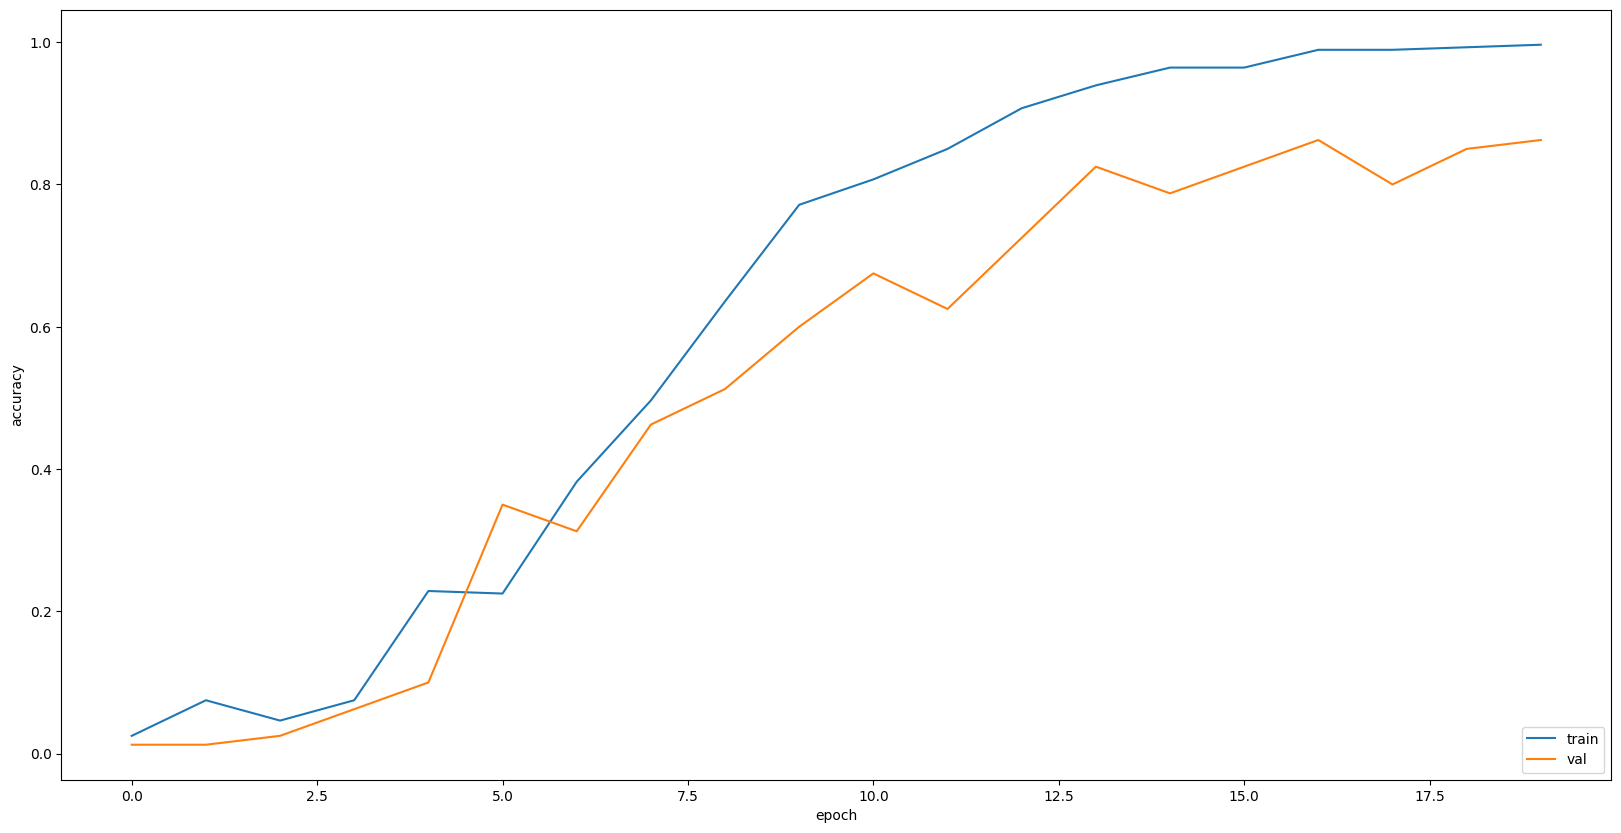

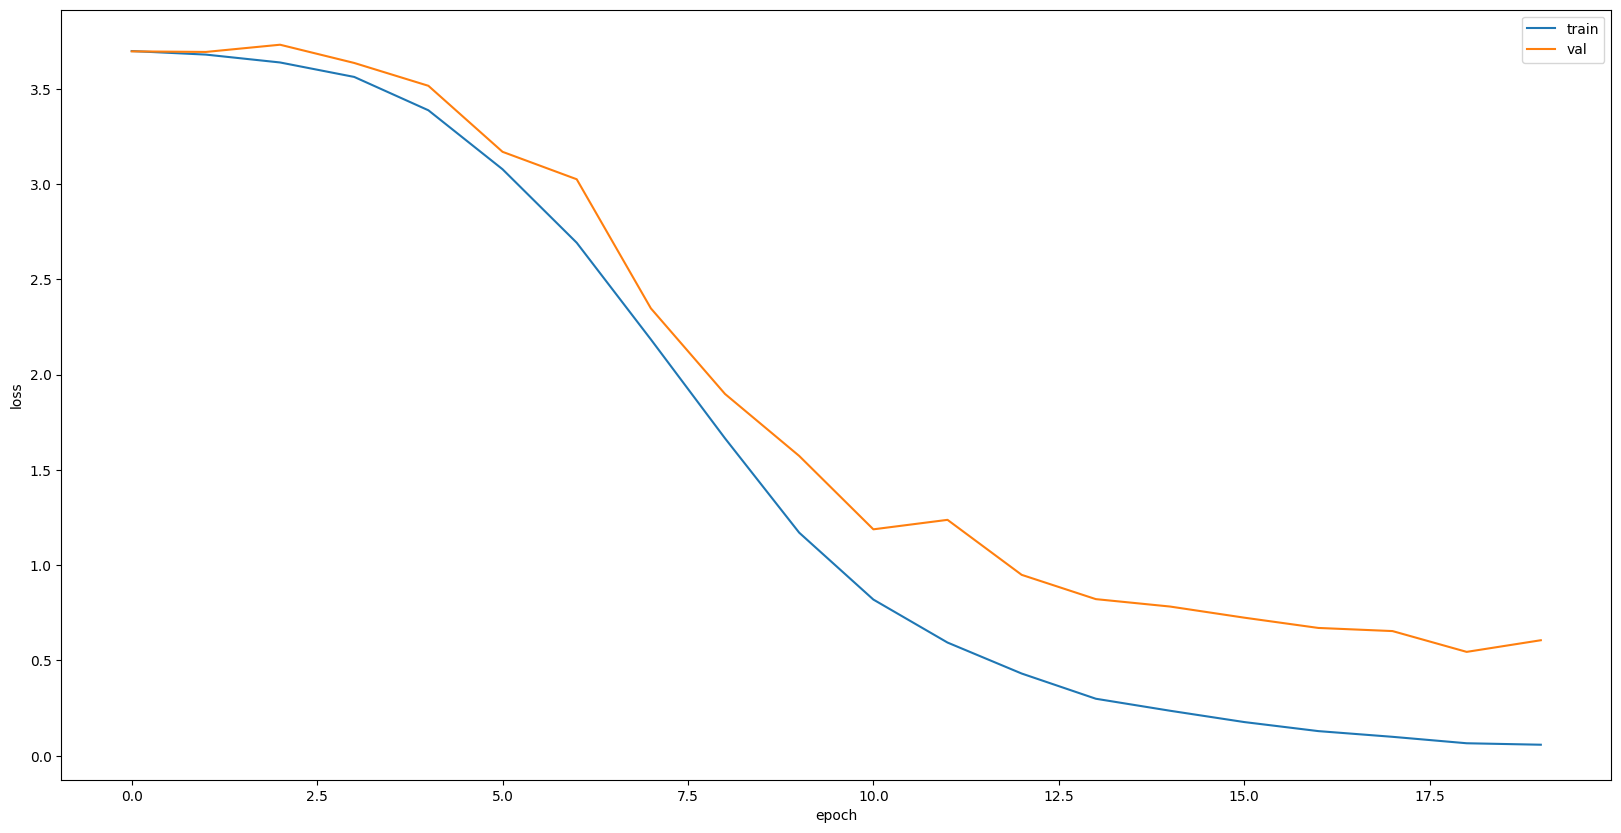

In [22]:
# training configuration
optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss=loss_function, metrics=['accuracy'])

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', patience=3, verbose=1)
model_save = tf.keras.callbacks.ModelCheckpoint(filepath='best_model.h5', monitor='val_accuracy', save_best_only=True)

#train using 70% of training cases and 20% test case and use 10% in the next step ( reduced the batch size from 32 to 20)
history = model.fit(x=xt_train,y=yt_train, epochs=num_epochs, batch_size=batch_size, validation_data=(x_test, y_test), callbacks=[early_stop, model_save])
#history = model.fit(x=x_train,y=y_train, epochs=num_epochs, batch_size=batch_size, validation_data=(x_test, y_test), callbacks=[early_stop, model_save])

print(x_train.shape)

print (x_test.shape)

plt.rcParams["figure.figsize"] = (20,10)

# accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

# loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [73]:
predictedvalues = model.predict(x_val)


predictedclass = np.argmax(predictedvalues, axis = 1)
#label5 = np.argmax(y_val)[:5]

print ("PRECDICTED CLASSES:")
print(predictedclass)
print ("ACTUAL VALIDATION CLASSES")
print(y_val)


positives = len(predictedclass[np.where(predictedclass == y_val)])


print ('Number of correctly identified images:' ,positives)
erroredp_array = (np.where(predictedclass != y_val))

print('# of erroed positions:',erroredp_array)
for i



#yhat_classes = model.predict_classes(x_val)

2/2 [==============================] - 0s 15ms/step
PRECDICTED CLASSES:
[30 35 14 10 18 11 13  9 22 14 26 38 27 32 21 16 21 16  1  8  7  8  9 27
 20 26 15 37 28 16 29 31 38 26 15 16  5 36 23 28]
ACTUAL VALIDATION CLASSES
[30 35 14 10 18 11 13  9 14 10 26 38 27 32 21 16 21 16 35  8  9  8  9 27
 20 26 15 37 12 16 29 31 38  6 10 16  5 36 23 28]
Number of correctly identified images: 33
# of erroed positions: (array([ 8,  9, 18, 20, 28, 33, 34]),)


In [66]:
from sklearn.metrics import f1_score
# Calculate F1 score for each class
f1_scores = f1_score(y_val, predictedclass, average=None)
print(f1_scores)

average_f1_score = np.mean(f1_scores)

print(average_f1_score)


[0.         1.         0.         0.         1.         0.8
 0.5        1.         0.         1.         0.5        0.66666667
 1.         1.         1.         1.         0.         1.
 0.8        1.         0.66666667 1.         1.         1.
 1.         0.66666667 1.         1.         1.        ]
0.7448275862068966


# Confusion Matrix
Since this is a random set of 40 images, not all classes are there to be identified. We see once again

Confusion Matrix:
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 

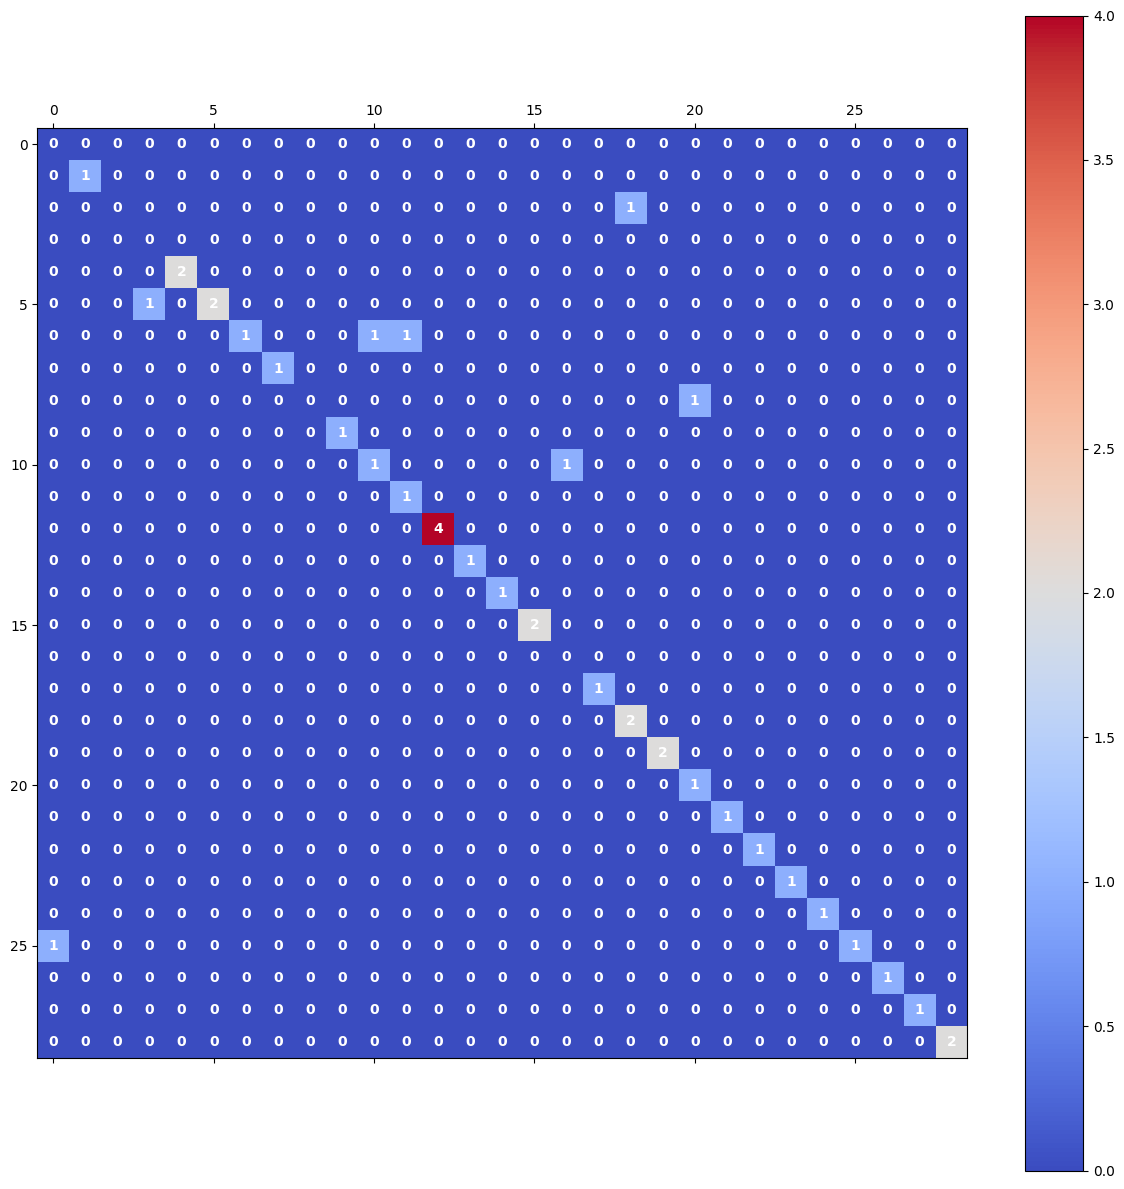

In [78]:
from sklearn.metrics import confusion_matrix




conf_matrix = confusion_matrix(y_val, predictedclass)

print("Confusion Matrix:")
print(conf_matrix)
plot_confusion(conf_matrix)